In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import pickle
import os

In [13]:
data = pd.read_csv("data.csv",header=None)
data = data.sample(frac=1)
data = data.reset_index(drop=True)
labels = data[0]
data = data.drop(0,axis='columns')
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.50, random_state=42)
y_test = y_test.values.tolist()

In [14]:
def modelAccuracy(modelname, predictions, test_gs):
    mcounter = 0
    for i in range(len(predictions)):
        if(predictions[i]!=test_gs[i]):
            mcounter+=1
    print(str(modelname)+" accuracy: "+str((1-(mcounter/len(predictions)))))
    return (1-(mcounter/len(predictions)))


In [15]:
def displayStats(predictions, truth):
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    import matplotlib.pyplot as plt
    cmat = confusion_matrix(truth,predictions)
    disp = ConfusionMatrixDisplay(cmat)
    disp.plot()
    plt.show()

In [6]:
from catboost import CatBoostClassifier
cbm = CatBoostClassifier()
cbm.fit(X_train,y_train)

Learning rate set to 0.00337
0:	learn: 0.6898717	total: 144ms	remaining: 2m 23s
1:	learn: 0.6875411	total: 224ms	remaining: 1m 51s
2:	learn: 0.6853692	total: 313ms	remaining: 1m 44s
3:	learn: 0.6831050	total: 407ms	remaining: 1m 41s
4:	learn: 0.6812076	total: 476ms	remaining: 1m 34s
5:	learn: 0.6791386	total: 549ms	remaining: 1m 30s
6:	learn: 0.6765175	total: 613ms	remaining: 1m 26s
7:	learn: 0.6747634	total: 671ms	remaining: 1m 23s
8:	learn: 0.6723453	total: 717ms	remaining: 1m 18s
9:	learn: 0.6698227	total: 767ms	remaining: 1m 15s
10:	learn: 0.6673882	total: 835ms	remaining: 1m 15s
11:	learn: 0.6649810	total: 896ms	remaining: 1m 13s
12:	learn: 0.6622174	total: 951ms	remaining: 1m 12s
13:	learn: 0.6603812	total: 1.01s	remaining: 1m 11s
14:	learn: 0.6583836	total: 1.08s	remaining: 1m 11s
15:	learn: 0.6550930	total: 1.15s	remaining: 1m 10s
16:	learn: 0.6523930	total: 1.21s	remaining: 1m 10s
17:	learn: 0.6502907	total: 1.27s	remaining: 1m 9s
18:	learn: 0.6481458	total: 1.33s	remaining: 1

In [16]:
pred_test = cbm.predict(X_test)
modelAccuracy("CatBoost", pred_test, y_test)
soft_preds = cbm.predict_proba(X_test)[:,1]
print("CatBoost ROC-AUC: "+ str(roc_auc_score(y_test,soft_preds)))

CatBoost accuracy: 0.7837837837837838
CatBoost ROC-AUC: 0.9055059523809524


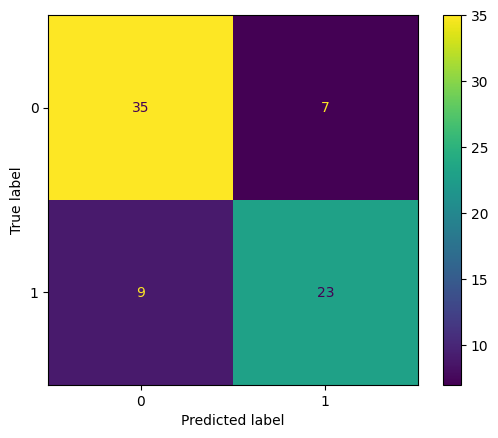

In [17]:
displayStats(pred_test,y_test)